# Úkol

Vašim cílem je vytvoření klasifikační neuronové sítě pro rozlišování různých druhů kosatců.

Budeme používat stejná stejná data jako v kapitole 5, můžete z ní vycházet.

Během zpracování tohoto úkolu bude postupně plnit tyto body

- Načtení dat a zobrazení základní statistiky
- Pro přípravu dat použijte binární encodování
- Vstupní hodnoty standardizujte pomocí StandardScaler
- Data si rozdělte na trénovací, testovací a validační

- Vytvořte model neurové sítě, nebojte se experimentovat s počtem skrytých vrstev a jejich velikostí
- Pravděpodobně budete potřebovat vrstvy Dense, můžete si vyzkoušet vrstvu Drop
- Jako aktivační funkce použijte relu, na výstupní vrstvu Softmax

- Při učení použijte nákladovou funkci categorical_crossentropy
- Optimalizační algoritmus bude ADAM
- Můžete sbírat další metriku accuracy

- Naučený model uložte do souboru

- Naučený model otestujte, zjištěte R2 a přesnost
- Vykreslete matici záměn

- Vykreslete historii učení

- Vyzkoušejte model na svých vstupních datech (vytvořte inferenci)

# Klasifikace datasetu IRIS pomocí ANN

Britský statistik a biolog Ronald Fisher publikoval v roce 1936 článek The use of multiple measurements in taxonomic problems jako příklad lineární diskriminační analýzy.

Dva ze tří druhů byly sbírány na poloostrově Gaspé "všechny ze stejné pastviny, sbírány ve stejný den a měřeny ve stejnou dobu stejnou osobou stejným přístrojem".

Soubor dat se skládá z 50 vzorků od každého ze tří druhů kosatce.

U každého vzorku byly změřeny čtyři znaky: délka a šířka kališních a okvětních lístků v centimetrech. 

Identifikace druhu kostace podle rozměrů různých okvětných lístků
- sepal - listy kalichu
- petal - okvětní lístek    

    https://en.wikipedia.org/wiki/Iris_flower_data_set
    https://www.kaggle.com/arshid/iris-flower-dataset

# 1. Načtení data a základní statistika
- náhled dat
- základní statistika
- NULL hodnoty

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('../dataset/IRIS.csv')

In [43]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [45]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Vizualizace dat
- rozložení distribuce hodnot

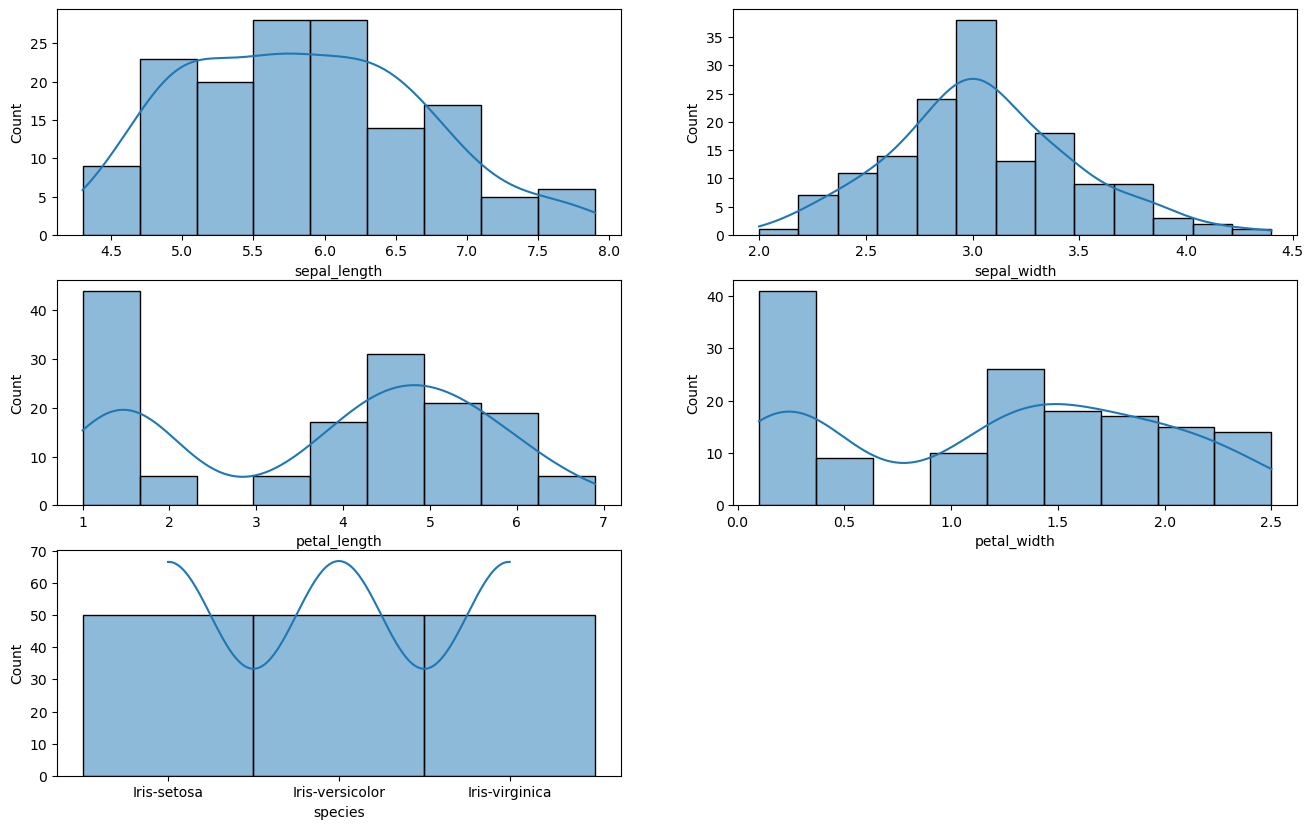

In [46]:
pos = 1
fig = plt.figure(figsize=(16,24))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i], ax=ax, kde=True)

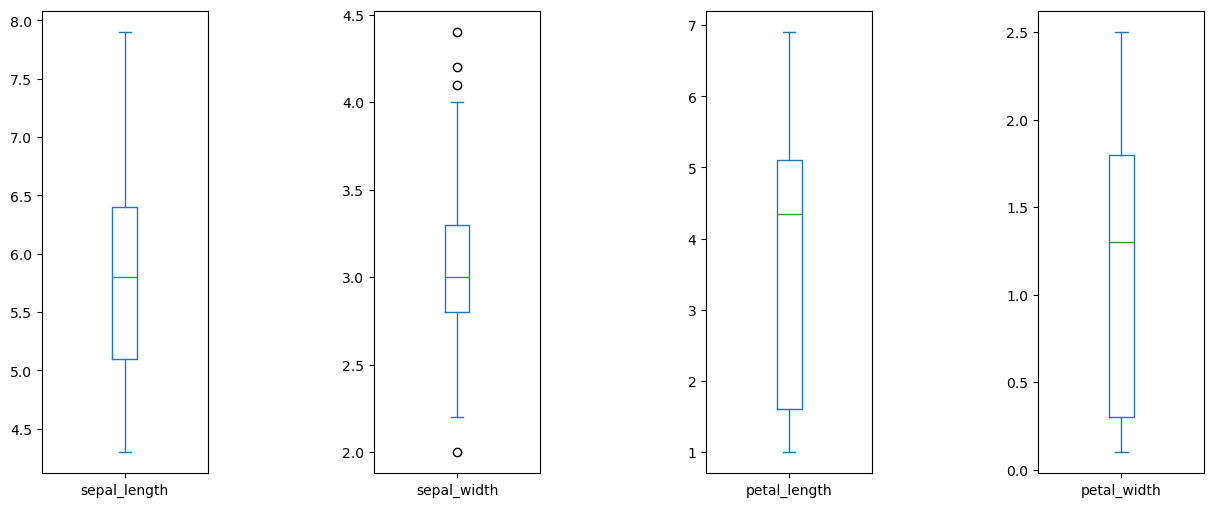

In [47]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

In [48]:
corr = data.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

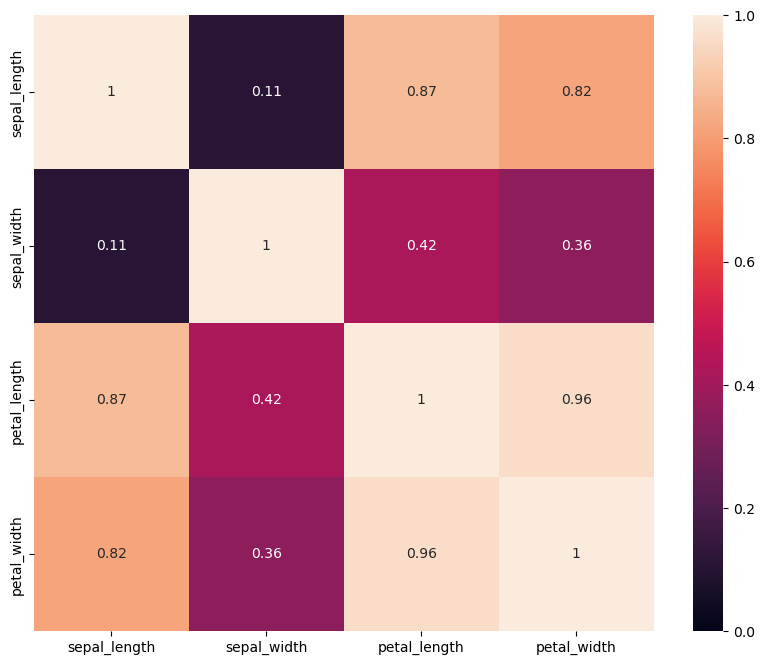

In [49]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

In [50]:
print (data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# 3. Příprava dat
- binární encoding
- standardizace vstupních proměnných

In [51]:
encoded_data = pd.get_dummies(data, columns=['species'])

In [52]:
from sklearn.preprocessing import StandardScaler

X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

y = pd.get_dummies(data['species'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Trénovací data: {X_train.shape}")
print(f"Validační data: {X_val.shape}")
print(f"Testovací data: {X_test.shape}")

Trénovací data: (105, 4)
Validační data: (22, 4)
Testovací data: (23, 4)


## 4 Modelování neuronové sítě

Model neuronové sítě
* Sekvenční model - data procházejí ze vstupní vrstvy přes skryté vrstvy do výstupní vrstvy.
* Dense vrstva propojuje každý neuron z předchozí vrstvy s každým neuronem ve vrstvě.
* Drop vrstva náhodně nastavuje vstupní jednotky na 0 v každém kroku během doby trénování, což pomáhá zabránit nadměrnému přizpůsobení.
* Používají se aktivační funkce RELU a Softmax. 
* Poslední funkce Softmax je použita ve výstupní vrstvě, protože tento projekt je klasifikační.

* Kompilace je posledním krokem při vytváření modelu.
* Optimalizátor, který používáme, je Adam. Adam je optimalizační algoritmus, který lze použít místo klasického postupu stochastického gradientního sestupu k iterativní aktualizaci vah sítě na základě trénovacích dat.
* Nákladová funkce - categorical_crossentropy, speciální ztrátová funkce pro klasifikaci (https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class).
* Během učení se počítá další metrika - Accuracy

Model: "sequential"
 Layer (type)                Output Shape              Param #   

 dense (Dense)               (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 

Total params: 403

Trainable params: 403

Non-trainable params: 0

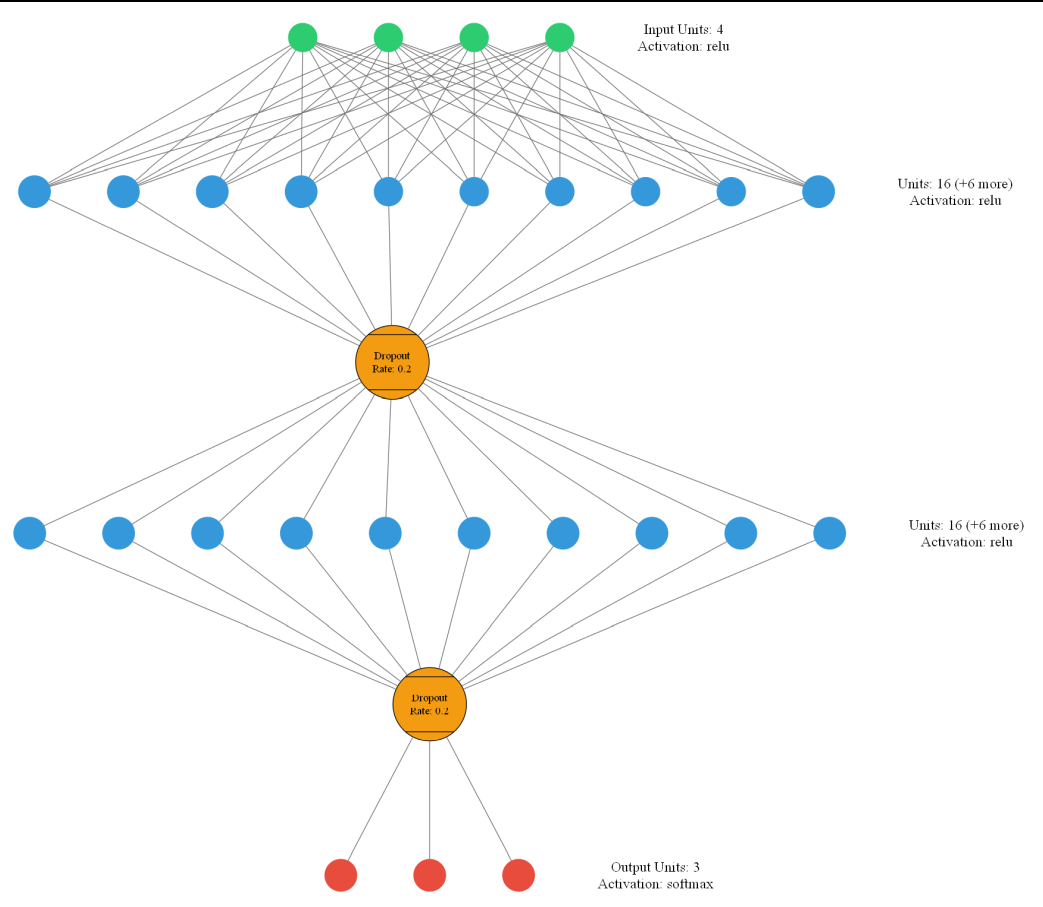

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [55]:
model = Sequential()

In [56]:
model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dropout(0.2))

/opt/anaconda3/envs/cvika_ver9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

In [58]:
model.add(Dense(3, activation='softmax'))

In [59]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model.fit(X_train, y_train,
                    epochs=100,            
                    batch_size=16,        
                    validation_data=(X_test, y_test))  

Epoch 1/100


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3188 - loss: 1.2823 - val_accuracy: 0.5217 - val_loss: 1.2280
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4335 - loss: 1.1987 - val_accuracy: 0.5217 - val_loss: 1.1498
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3932 - loss: 1.1944 - val_accuracy: 0.5652 - val_loss: 1.0832
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4174 - loss: 1.1531 - val_accuracy: 0.5652 - val_loss: 1.0228
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4955 - loss: 1.1267 - val_accuracy: 0.5652 - val_loss: 0.9692
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5067 - loss: 1.0195 - val_accuracy: 0.6087 - val_loss: 0.9207
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5251 - loss: 1.0071 - val_accuracy: 0.6522 - val_loss: 0.8787
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6307 - loss: 0.9437 - val_accuracy: 0.6522 - val_loss: 0.8409
Epoch 9/100

# 5. Uložení modelu

In [62]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

# 6. Zobrazení historie učení

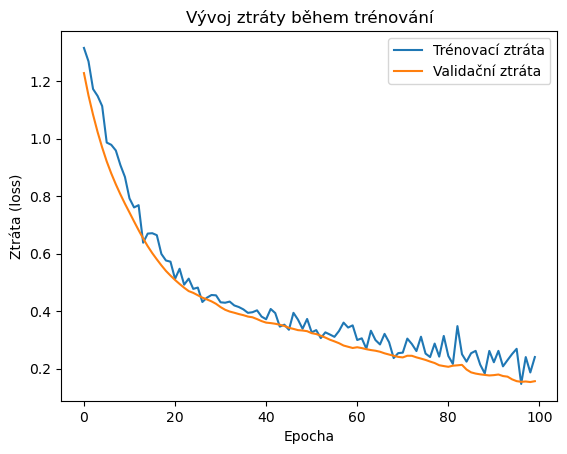

In [63]:
plt.plot(history.history['loss'], label='Trénovací ztráta')
plt.plot(history.history['val_loss'], label='Validační ztráta')
plt.xlabel('Epocha')
plt.ylabel('Ztráta (loss)')
plt.title('Vývoj ztráty během trénování')
plt.legend()
plt.show()

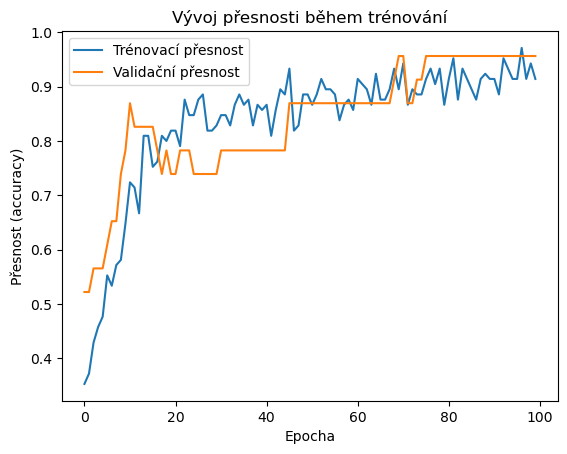

In [64]:
plt.plot(history.history['accuracy'], label='Trénovací přesnost')
plt.plot(history.history['val_accuracy'], label='Validační přesnost')
plt.xlabel('Epocha')
plt.ylabel('Přesnost (accuracy)')
plt.title('Vývoj přesnosti během trénování')
plt.legend()
plt.show()

# 7. Ověření modelu
- predikce testovacích hodnot
- R2 skóre
- Přesnost
- Confusion matrix trénovacích a testovacích dat

Predikce testovacích hodnot

In [65]:
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


R2 skóre

In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true, y_pred)
print(f"R² skóre: {r2:.4f}")

R² skóre: 0.9228


Přesnost

In [67]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred)
print(f"Přesnost (Accuracy): {acc:.4f}")

Přesnost (Accuracy): 0.9565


Confusion Matrix

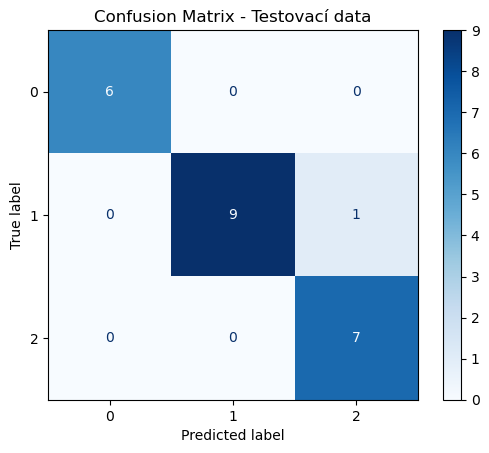

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Testovací data")
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


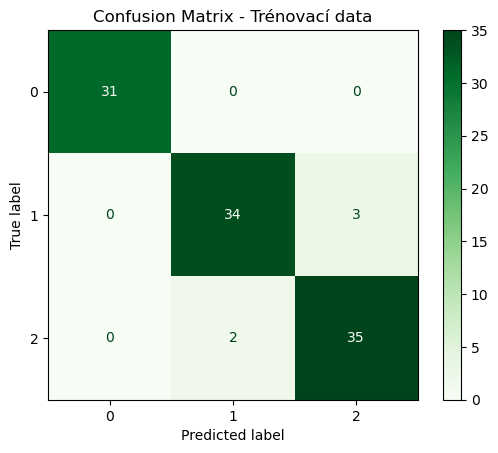

In [69]:
y_train_pred_prob = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_train_true = np.argmax(y_train, axis=1)

cm_train = confusion_matrix(y_train_true, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot(cmap='Greens')
plt.title("Confusion Matrix - Trénovací data")
plt.show()

# 8. Použití modelu

In [71]:
test_input = [[7,3.2,4.7,1.4]]

test_input_scaled = scaler.transform(test_input)

test_predictions = model.predict(test_input_scaled)

print(f"Iris setosa:     {test_predictions[0][0]:.4f}")
print(f"Iris versicolor: {test_predictions[0][1]:.4f}")
print(f"Iris virginica:  {test_predictions[0][2]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Iris setosa:     0.0094
Iris versicolor: 0.7472
Iris virginica:  0.2433


/opt/anaconda3/envs/cvika_ver9/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
